# Perform GSEA using GSEAPY  

Following the potocol defined here: https://gseapy.readthedocs.io/en/latest/gseapy_tutorial.html#use-gsea-command-or-gsea


In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina' # mac
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

In [2]:
gp.__version__

'0.9.9'

## 1. Prepare expression file
In our case, the expression file is the percentage of cells inside each pseudostate **bin**

In [3]:
gene_exp = pd.read_table("./dat/beta.100_bin_pseudotime_raw.promoter.txt").transpose()
gene_exp.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
SAMD11,0.0,0.0,0.000000,2.857143,1.162791,1.047120,0.613497,1.441441,0.000000,2.040816,...,0.416667,0.5,3.875969,1.204819,0.000000,0.000,0.000000,0.0,0.0,0.0
NOC2L,0.0,0.0,6.666667,5.714286,2.325581,3.664921,2.453988,3.603604,1.010101,2.040816,...,2.500000,3.0,3.875969,3.614458,6.896552,9.375,9.090909,0.0,20.0,0.0
KLHL17,0.0,0.0,0.000000,2.857143,2.325581,1.570681,0.920245,0.900901,2.020202,2.040816,...,0.416667,1.0,1.550388,0.000000,1.724138,3.125,4.545455,0.0,0.0,0.0
PLEKHN1,0.0,0.0,0.000000,0.000000,1.162791,1.047120,0.306748,1.981982,2.020202,2.040816,...,2.500000,4.0,2.325581,0.000000,5.172414,0.000,4.545455,0.0,0.0,0.0
HES4,0.0,0.0,0.000000,2.857143,2.325581,2.617801,1.533742,1.261261,2.020202,0.000000,...,1.250000,2.5,3.100775,4.819277,1.724138,0.000,4.545455,10.0,0.0,0.0


## 2. Phenotype file (.cls)
- The first line specify the total samples and phenotype numbers. Leave number 1 alway be 1.
- The second line specify the phenotype class(name).
- The third line specify column attributes in setp 1.

In [4]:
threshold=round((10.3107-9.39)/(11.27-9.39)*100)
threshold

49

In [5]:
with open('./dat/pheno_beta.cls',"w") as f:
    f.write("100 2 1\n")
    f.write("#B1 B2\n")
    f.write("B1 "*threshold+("B2 "*(100-threshold)).rstrip()+"\n")

In [6]:
phenoA, phenoB, class_vector =  gp.parser.gsea_cls_parser("./dat/pheno_beta.cls")
#class_vector used to indicate group attributes for each sample
print(class_vector)

['B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2']


In [7]:
print("positively correlated: ", phenoA)

positively correlated:  B1


In [8]:
print("negtively correlated: ", phenoB)


negtively correlated:  B2


## 3. define gene sets

In our case, we will use the beta gene sets from the three literature. And save to [gmt](http://software.broadinstitute.org/cancer/software/gsea/wiki/index.php/Data_formats#GMT:_Gene_Matrix_Transposed_file_format_.28.2A.gmt.29) format.

It was done in another [notebook](./compare_with_previous_glists.ipynb)

## 4. Run gsea
The result is look like this:

![The result interpetation](https://software.broadinstitute.org/gsea/doc/ug_images/anl-enrichment-geneset-plot-annotated.gif)

see also https://software.broadinstitute.org/gsea/doc/GSEAUserGuideFrame.html

- Normalized Enrichment Score (NES)=$\frac{\textrm{actual ES}}{\textrm{mean ES against all permutations}}$

In [9]:
# run gsea
# enrichr libraries are supported by gsea module. Just provide the name

gs_res = gp.gsea(data=gene_exp, # or data='./P53_resampling_data.txt'
                 gene_sets='./dat/glists/gsea.gmt', # enrichr library names or gmt file
                 cls= class_vector, # cls=class_vector
                 #set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=100, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 processes=4,
                 min_size=0,
                 max_size=4000,
                 format='png')

In [10]:
#access the dataframe results throught res2d attribute
gs_res.res2d

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
A1_alpha,-0.557401,-2.065163,0.000000,0.000000,3526,3526,FFAR4;C5orf49;HECW2;CDKN1A;XKR9;NPM2;TRIM67;CM...,SMARCC1;ARHGAP12;TBKBP1;PPP6R1;FAM126B;RFPL2;S...
A2_alpha,0.622584,2.519719,0.000000,0.000000,240,239,G6PC2;MS4A8;IGFBP1;GRIK1;NEUROD1;NKAIN3;DNAH12...,G6PC2;MS4A8;IGFBP1;GRIK1;NEUROD1;NKAIN3;DNAH12...
B1_beta,-0.990073,-3.495395,0.000000,0.000000,420,420,SERPINE2;TM9SF2;FARP2;SHQ1;PHF1;POLM;ACAD11;AR...,SERPINE2;TM9SF2;FARP2;SHQ1;PHF1;POLM;ACAD11;AR...
B2_beta,0.994000,3.058553,0.000000,0.000000,75,75,G6PC2;MYLK3;INS-IGF2;MS4A8;KCNK17;IGFBP1;SPON2...,G6PC2;MYLK3;INS-IGF2;MS4A8;KCNK17;IGFBP1;SPON2...
Beta sub4_xin,-0.422557,-1.679032,0.000000,0.000000,390,323,CCT6A;TMSB4X;PSMF1;COPZ1;SSR3;DNAJB9;CHCHD2;HS...,RABGGTB;PITHD1;HLA-E;EMC7;CYSTM1;EIF5;NOP10;CR...
immature_bader,-0.381203,-1.553873,0.000000,0.000000,579,441,G6PC2;GCK;NELL1;BCKDK;PSMF1;SERPINA10;GPC4;HSB...,SCD;C9orf64;RGS11;ISCA2;CLN6;ATOX1;FBXO2;CNPY3...
Beta sub1_xin,0.579981,1.785934,0.000000,0.128205,13,11,FFAR4;SCGB2A1;RBP4;FXYD2;PRSS23;TUBA4A;TUBB2A;...,FFAR4;SCGB2A1;RBP4
Beta sub2_xin,0.435350,1.438156,0.250000,0.168269,28,25,ID1;NPY;STMN2;TFF3;RGS16;JUNB;RBP1;SEC11C;GPX3...,ID1;NPY;STMN2;TFF3;RGS16;JUNB;RBP1;SEC11C;GPX3
Beta sub3_xin,0.516229,1.291018,0.111111,0.240385,13,8,DLK1;CHGA;IGFBP7;ASB9;LAMP1;TIMP1;CKB;CHGB,DLK1;CHGA;IGFBP7;ASB9


### show the results 
The **gsea** module will generate heatmap for genes in each gene sets in the backgroud.
But if you need to do it yourself, use the code below

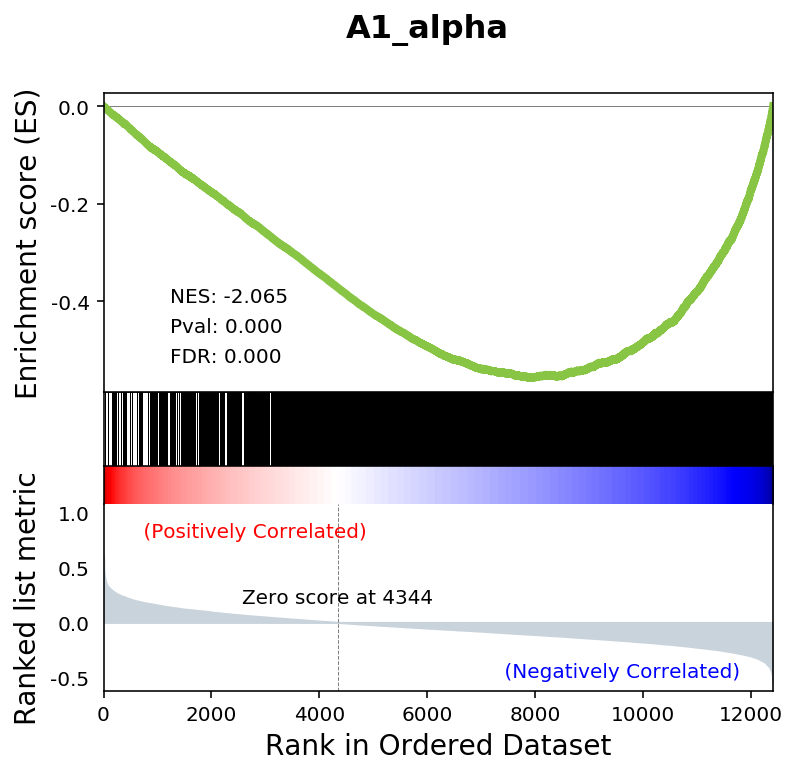

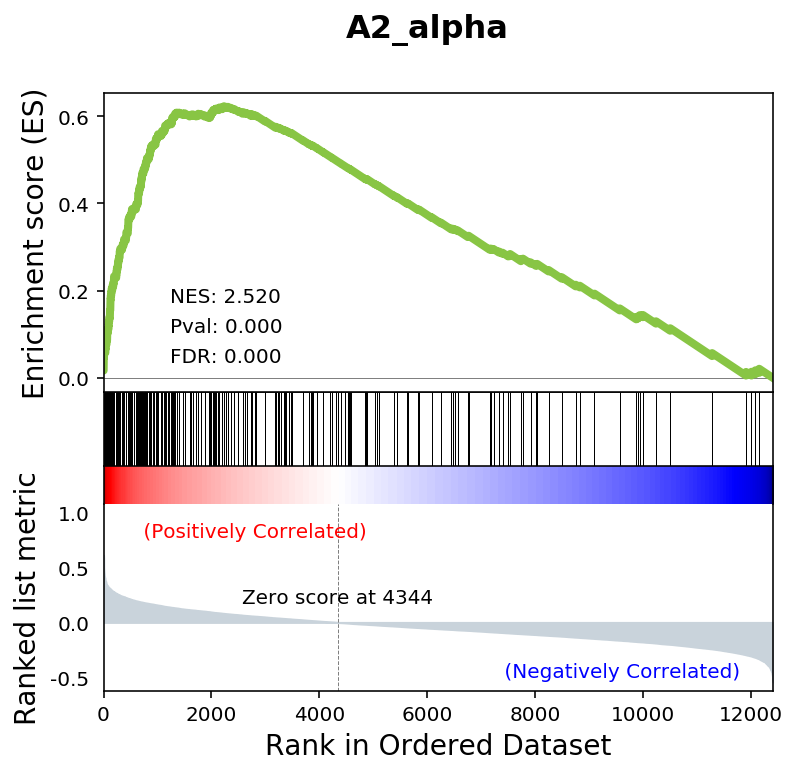

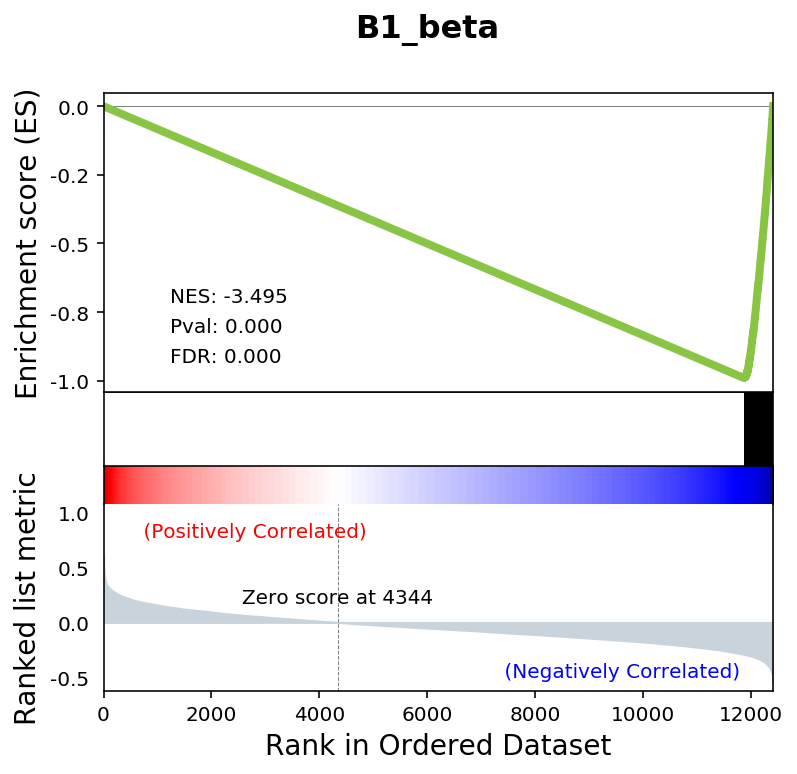

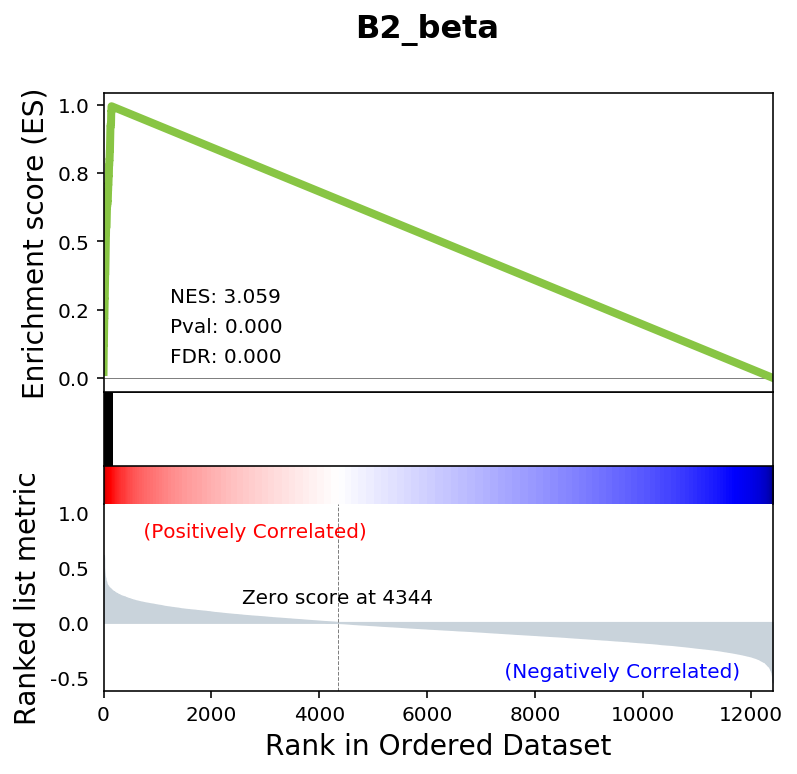

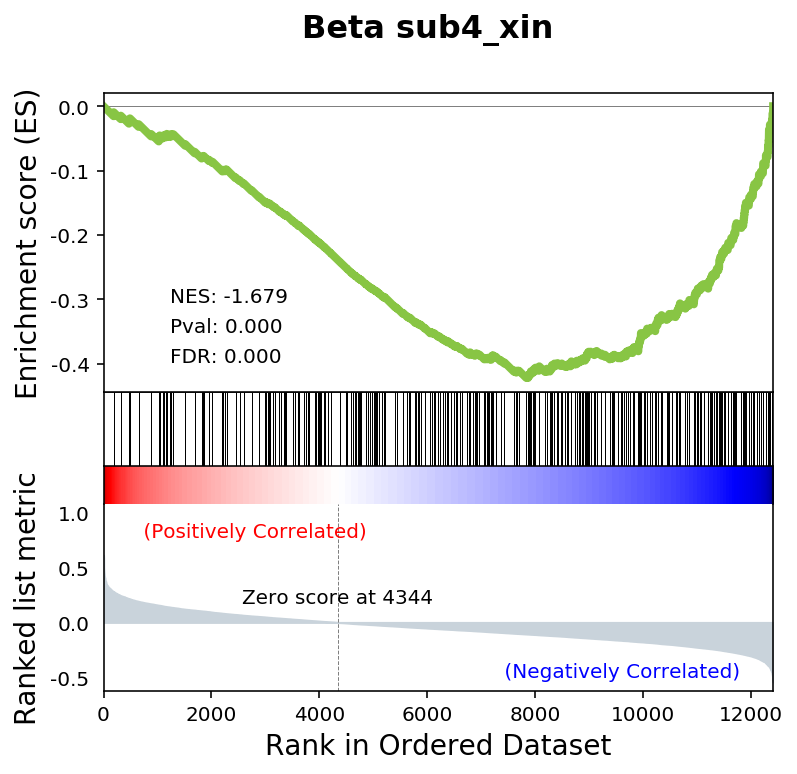

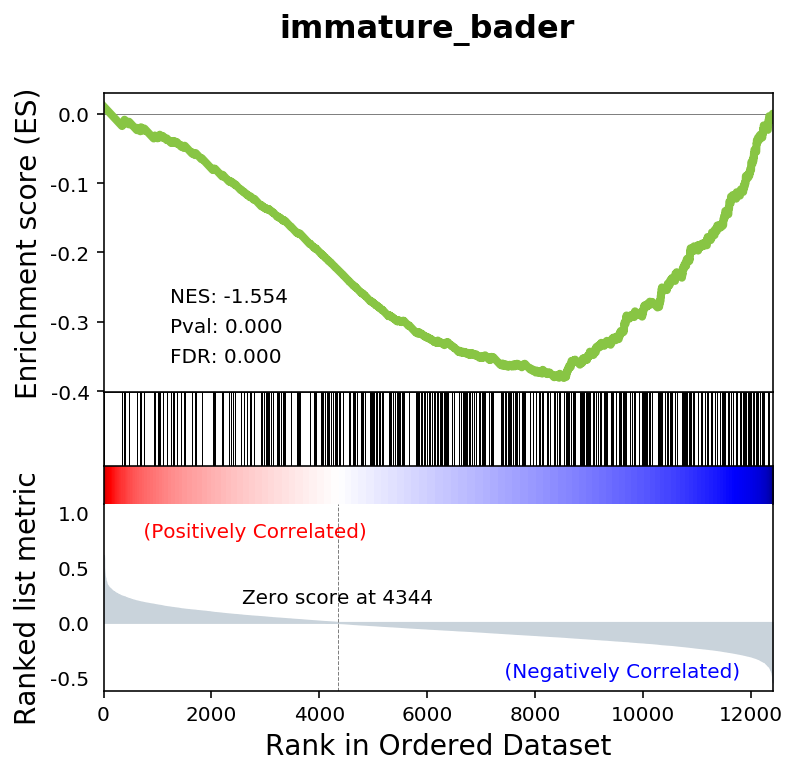

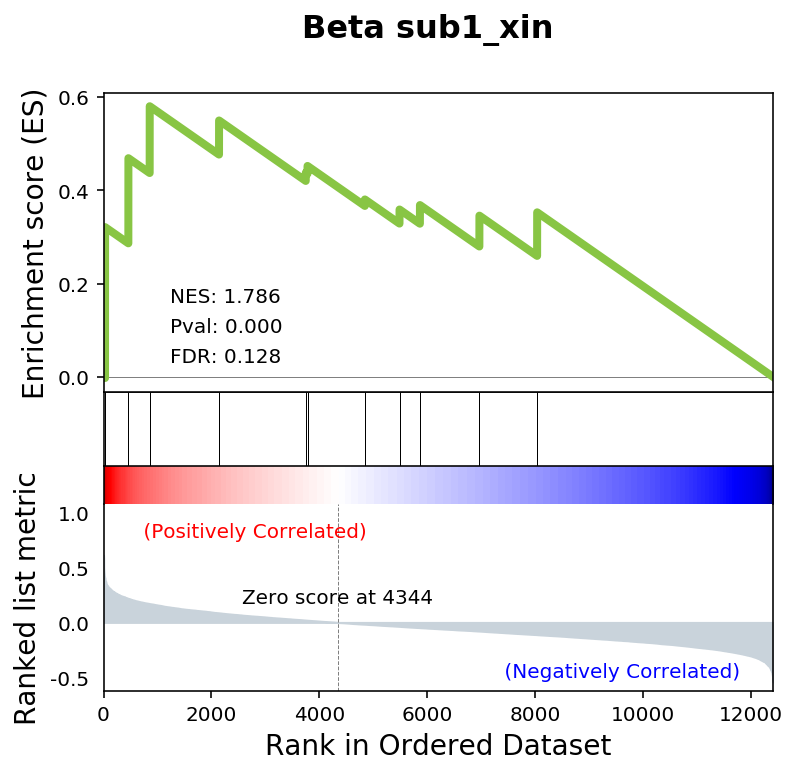

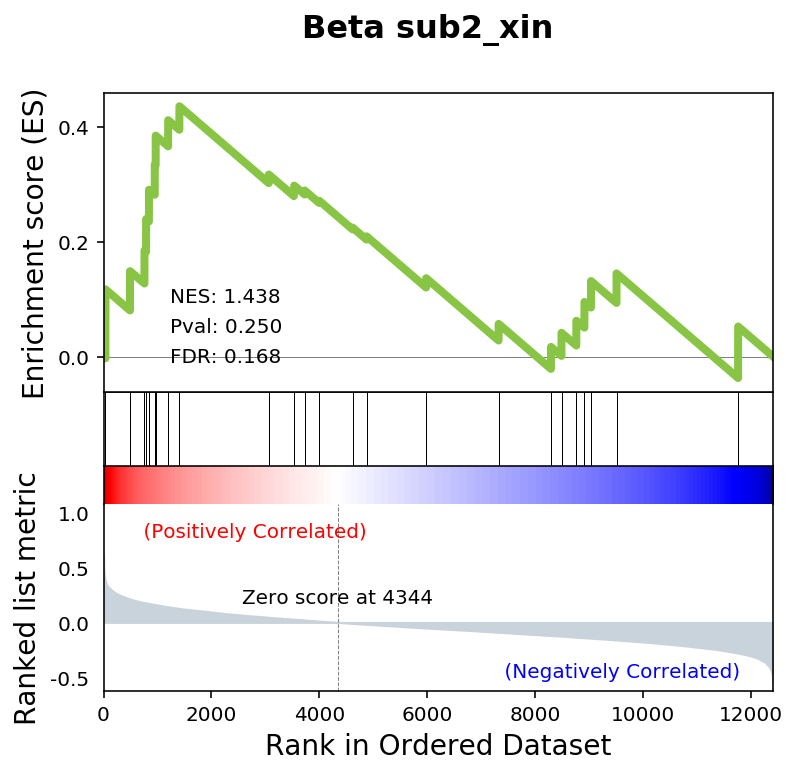

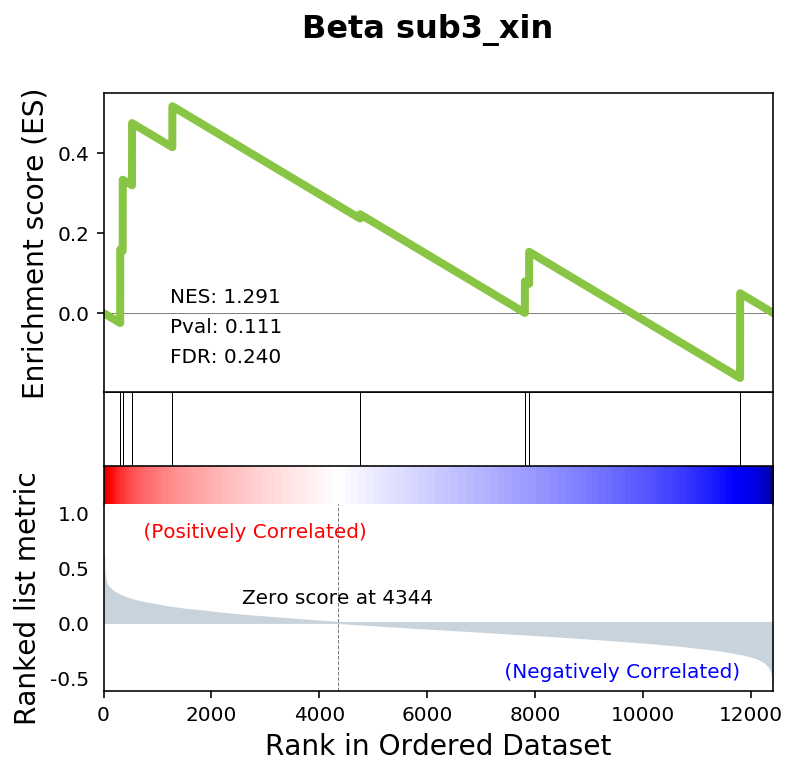

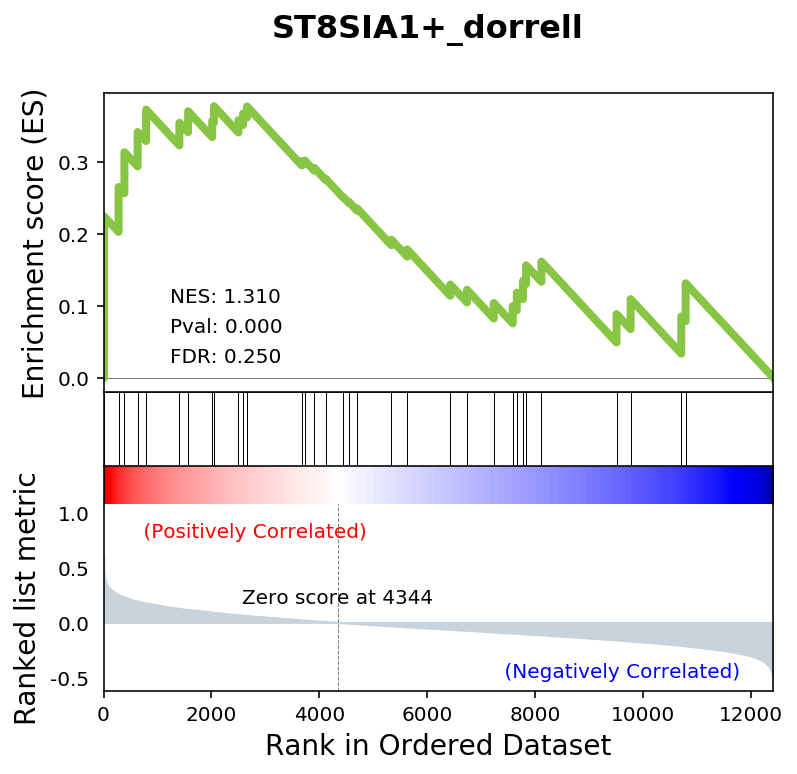

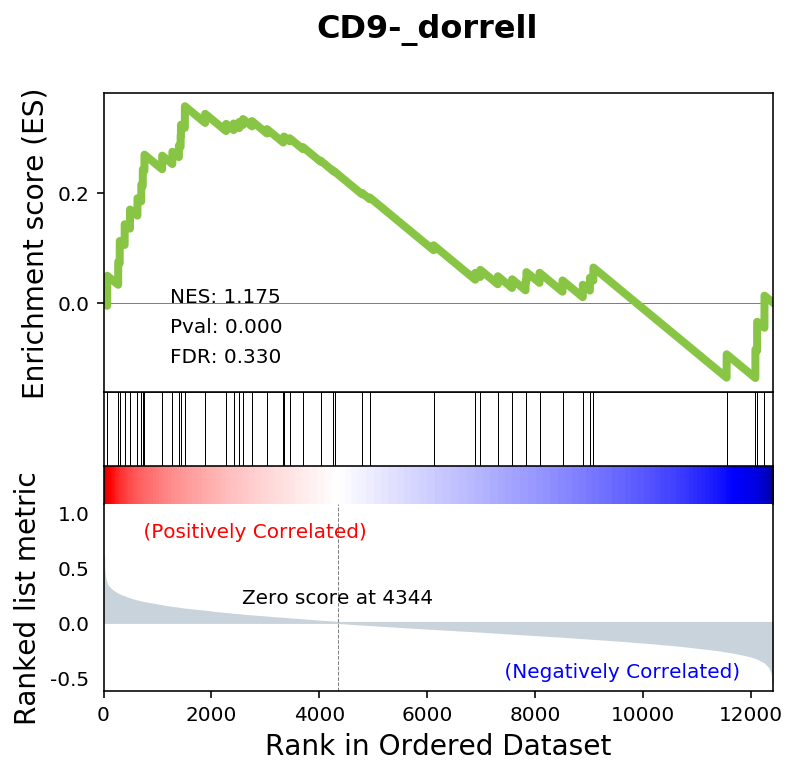

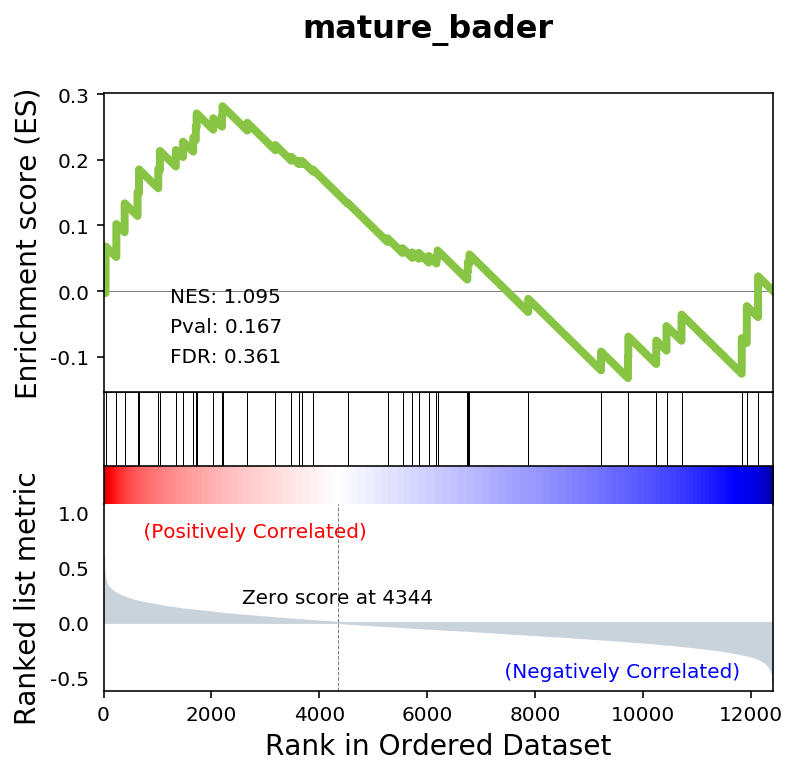

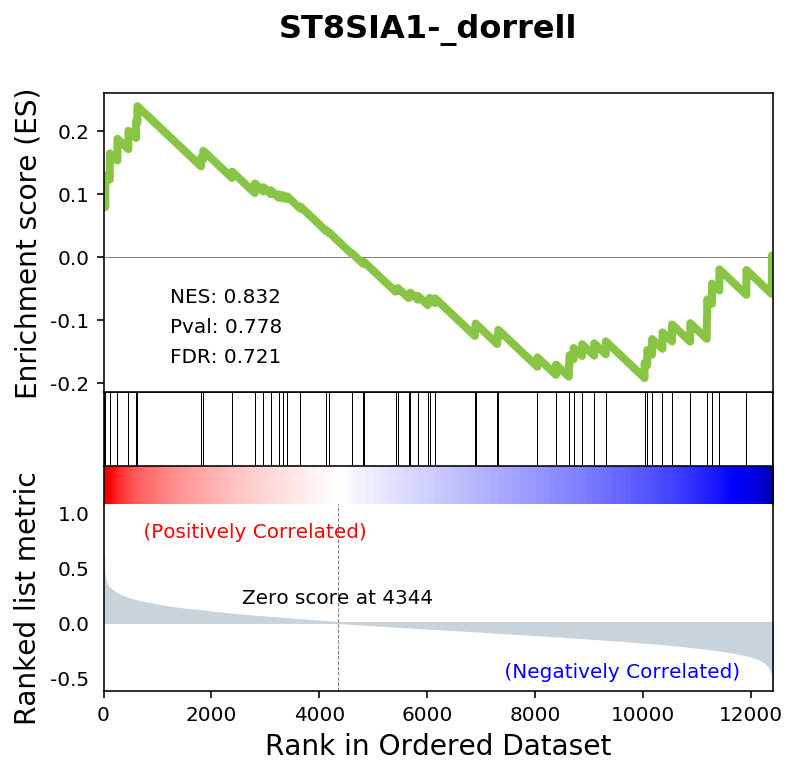

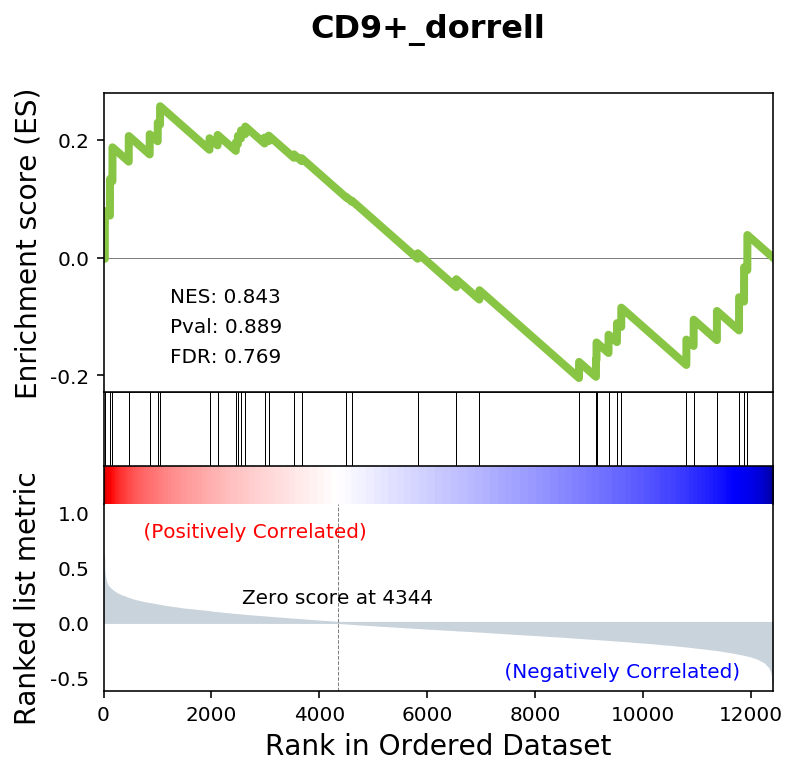

In [11]:
from gseapy.plot import gseaplot, heatmap
terms = gs_res.res2d.index
for i in range(len(terms)):
    gseaplot(gs_res.ranking, term=terms[i], **gs_res.results[terms[i]])
